In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def dist_mat(shape):
    m, n = shape
    m2, n2 = np.floor(m / 2.0), np.floor(n / 2.0)
    [vx, vy] = np.meshgrid(np.arange(-m2, m2 + 1), np.arange(-n2, n2 + 1))
    distToCenter = np.sqrt(vx ** 2.0 + vy ** 2.0)
    return distToCenter
# -----------------------------------
# High-, low- and band-pass filters
# -----------------------------------

# generic band-pass filter (both, R and r, given) which includes the low-pass (r given, R not)
# and the high-pass (R given, r not) as particular cases
def passBandFilter(shape, r=None, R=None):
    distToCenter = dist_mat(shape)
    if R is None:  # low-pass filter assumed
        assert r is not None, "at least one size for filter is expected"
        filter = distToCenter < r # same as np.less(distToCenter, r)    
    elif r is None:  # high-pass filter assumed
        filter = distToCenter > R  # same as np.greater(distToCenter, R)
    else:  # both, R and r given, then band-pass filter
        if r > R:
            r, R = (
                R,
                r,
            )  # swap to ensure r < R (alternatively, warn the user, or throw an exception)
        filter = np.logical_and(distToCenter < R, distToCenter > r)
    filter = filter.astype(
        "float"
    )  # convert from boolean to float. Not strictly required

    bDisplay = True
    if bDisplay:
        plt.imshow(filter, cmap="gray")
        plt.show()
        # Image.fromarray((255*filter).astype(np.uint8)).save('filter.png')

    return filter



def smoothPassBandFilter(shape, r=None, R=None,u = 2):
    dists = dist_mat(shape)
    inc=np.zeros(shape) 
    call = all((r,R))
    
    R = R if R else r
    m = -1/u
    dec = 1 + m * (dists-R)
    dec = dec * np.logical_and(dists > R,dists < R+u).astype(float)
    plt.imshow(dec,cmap='gray')
    plt.show()

    if call:
        print('inc')
        m = 1/u
        inc =0+m * (dists-(r-u))
        # print(inc)
        inc = inc * np.logical_and(dists > (r-u),dists < r).astype(float)
        plt.imshow(inc,cmap='gray')
        plt.show()
        
    res = passBandFilter(shape,r=r,R=R) + inc + dec
    plt.imshow(res,cmap='gray')
    plt.show()
    return res

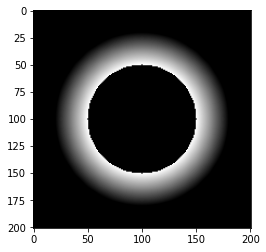

inc


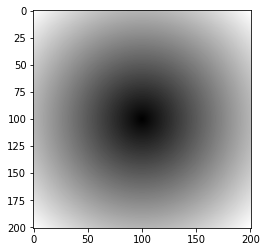

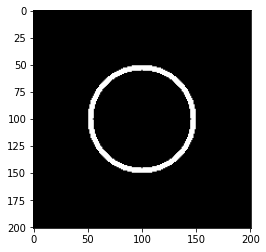

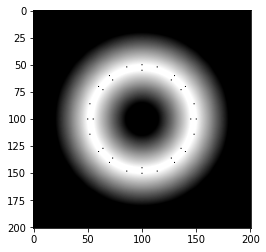

0.0

In [7]:
smoothPassBandFilter((201,201),R=50,r=45,u=30)[100,113]